# Minería de Datos - 2024 - Gravi Fiorino, Mateo . Lo Menzo , Alejo. 


# Abrir dataset e importar librerias

-- Carga de librerías necesarias --

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage

-- Apertura del dataset + categórica de label --

In [3]:
df = pd.read_csv("Crop_recommendation.csv")
df['label'] = df['label'].astype('category')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


# Analisis exploratorio

-- Comandos básicos para análisis exploratorio --

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.dtypes

N                 int64
P                 int64
K                 int64
temperature     float64
humidity        float64
ph              float64
rainfall        float64
label          category
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   N            2200 non-null   int64   
 1   P            2200 non-null   int64   
 2   K            2200 non-null   int64   
 3   temperature  2200 non-null   float64 
 4   humidity     2200 non-null   float64 
 5   ph           2200 non-null   float64 
 6   rainfall     2200 non-null   float64 
 7   label        2200 non-null   category
dtypes: category(1), float64(4), int64(3)
memory usage: 123.3 KB


In [7]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

-- Matriz de correlacion para ver la correlación lineal entre variables --

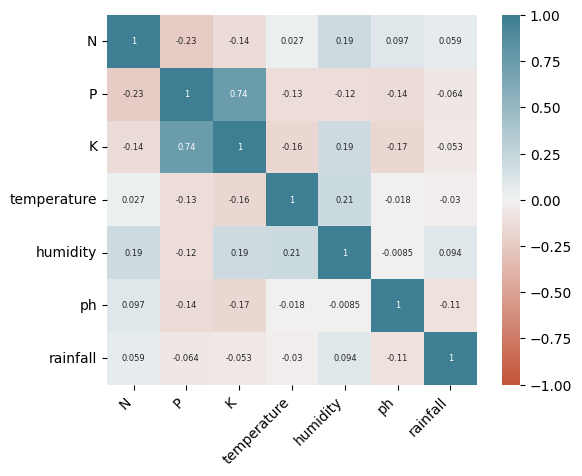

In [9]:
corr = df.drop(['label'], axis=1).corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

-- Grafico boxplot \
Para identificar la distribución y los valores atípicos de las variables numéricas. --

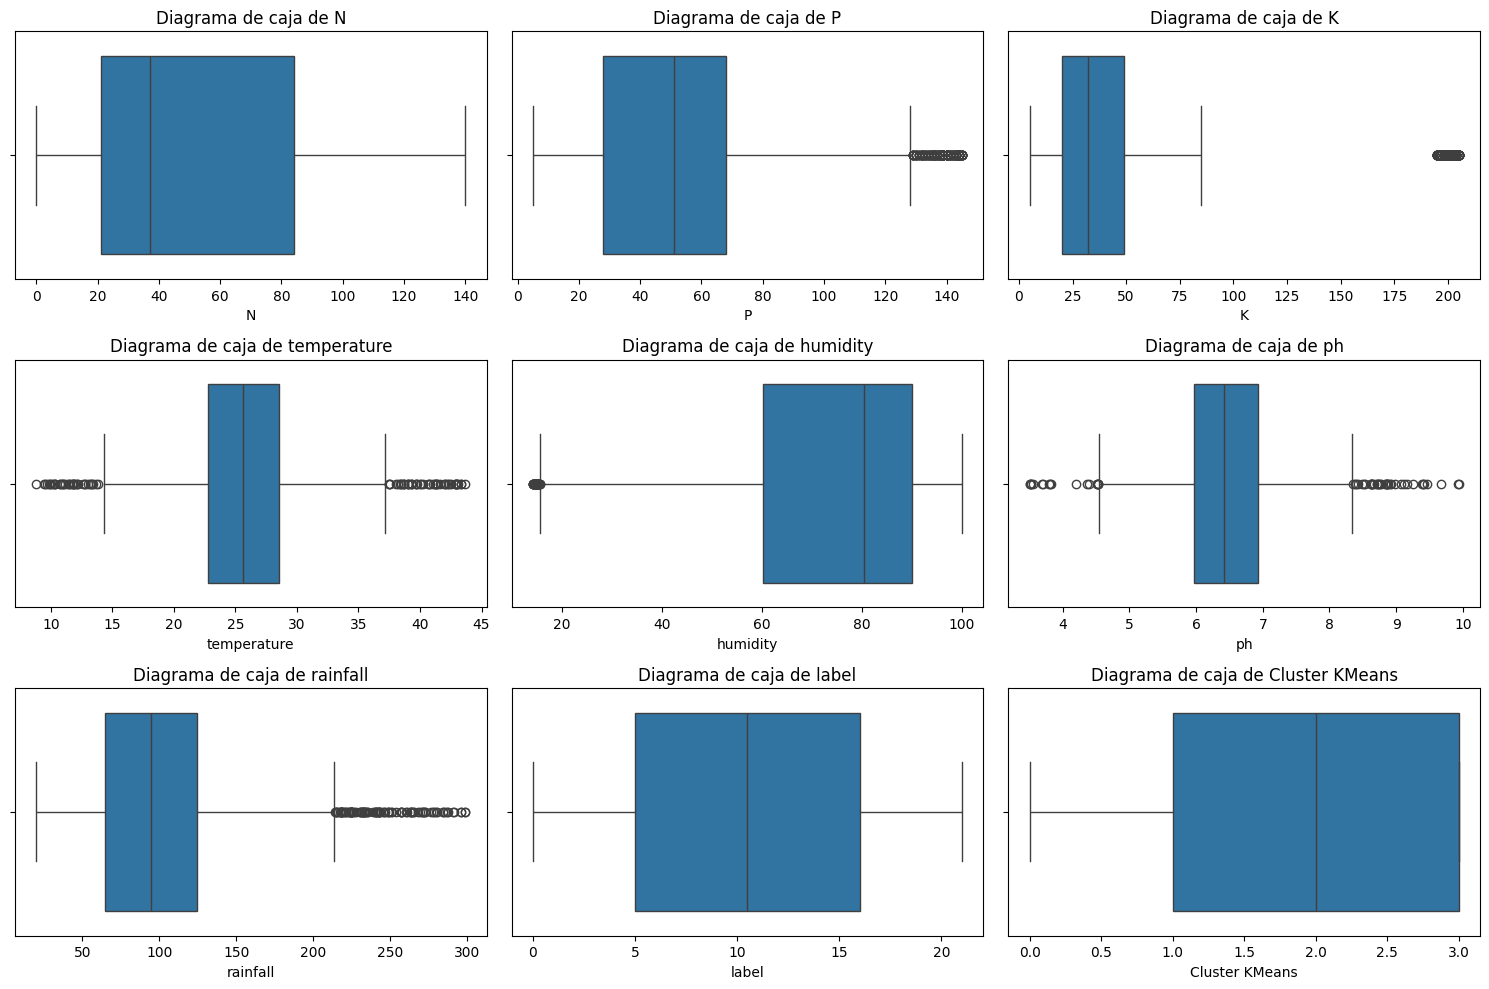

In [42]:
# Diagramas de caja para variables numéricas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, var in enumerate(df.columns):
    sns.boxplot(x=df[var], ax=axes[i])
    axes[i].set_title(f'Diagrama de caja de {var}')

plt.tight_layout()
plt.show()

-- Histograma para visualizar la distribucion de  cada variable numerica --

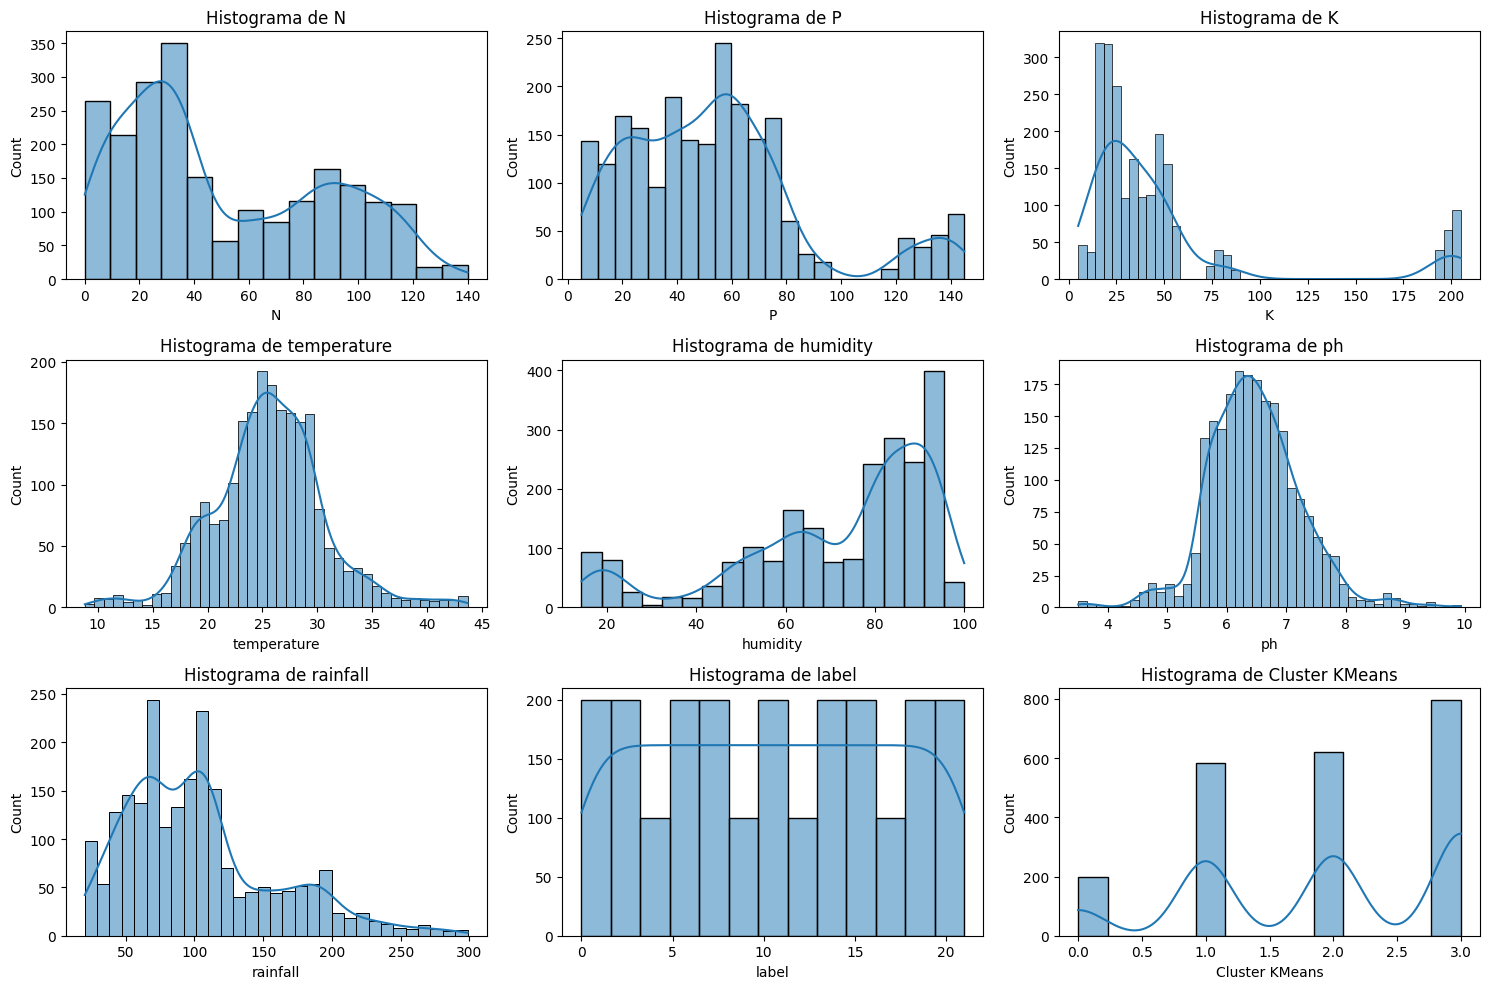

In [44]:
# Histogramas para variables numéricas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, var in enumerate(df.columns):
    sns.histplot(df[var], ax=axes[i], kde=True)
    axes[i].set_title(f'Histograma de {var}')

plt.tight_layout()
plt.show()

-- Diagramas de dispersion para entender la relacion entre dos variables --

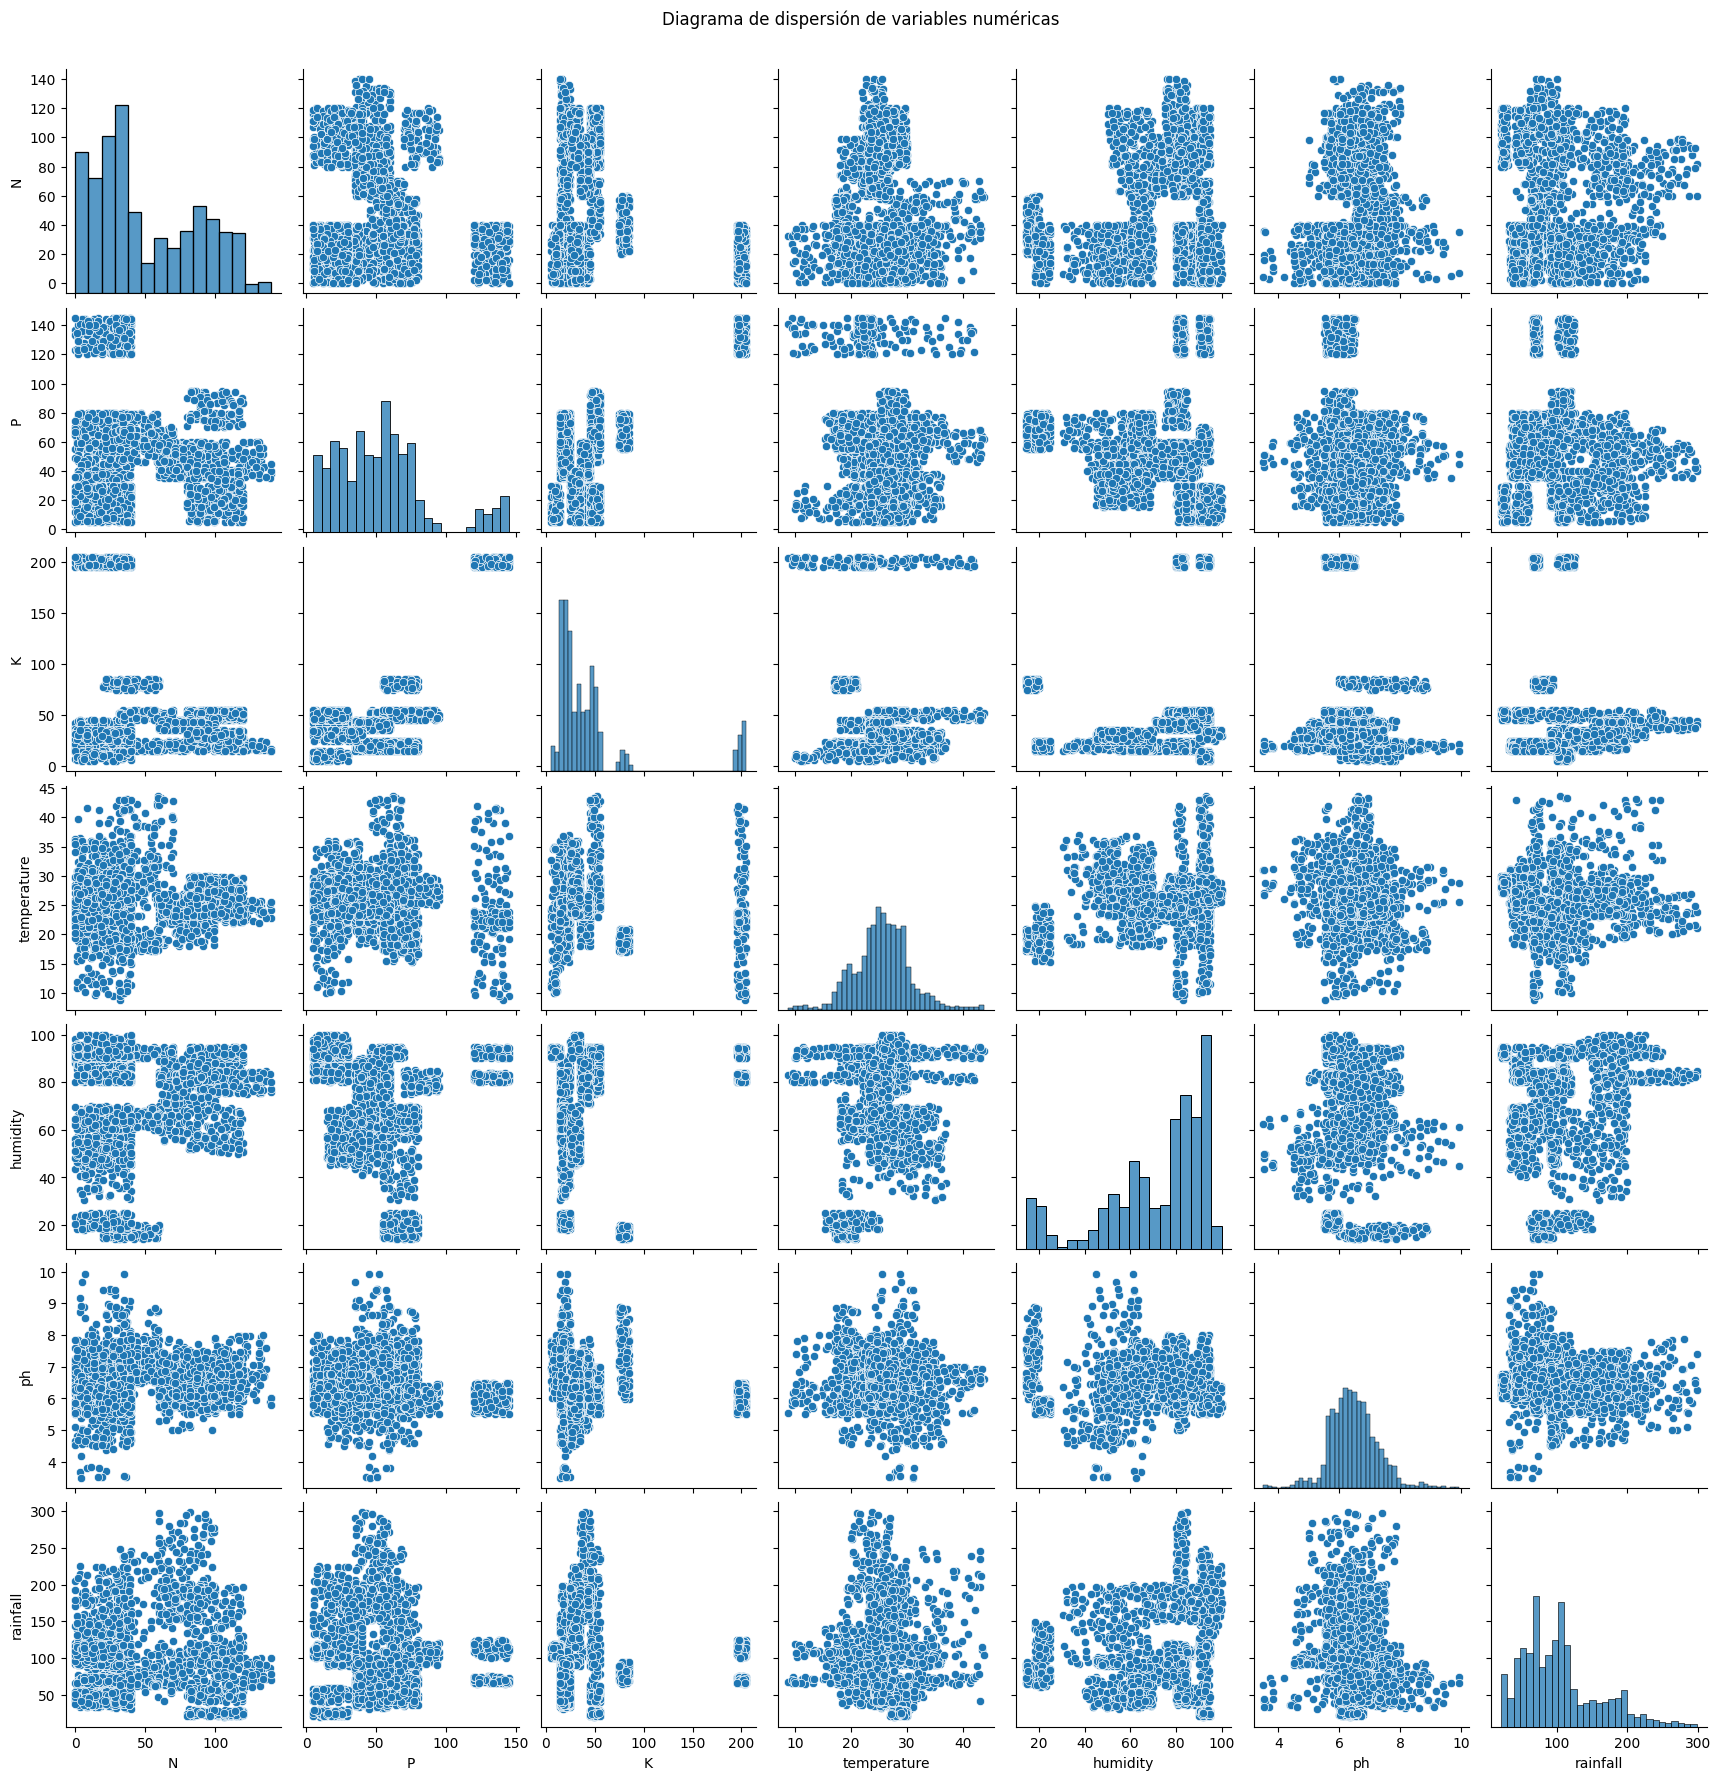

In [46]:
num_vars = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Diagramas de dispersión
sns.pairplot(df, vars=num_vars)
plt.suptitle('Diagrama de dispersión de variables numéricas', y=1.02)
plt.show()

# PCA


-- ¿Por qué PCA? 
Reducir la dimensionalidad de un conjunto de datos mientras se conserva la mayor cantidad posible de su variabilidad 
* Reducción de dimensionalidad 
* Eliminación de la multicolinealidad 
* Identificación de patrones subyacentes 
* Visualización de datos de alta dimensionalida 
* Mejora del rendimiento de los modelos 
-- 


In [10]:
df_sub = df.drop(['label'], axis=1)
df_std = (df_sub-df_sub.mean())/df_sub.std()
df_std

,N,P,K,temperature,humidity,ph,rainfall
0,1.068554,-0.344472,-0.101664,-0.935374,0.472559,0.043292,1.809949
1,0.933117,0.140584,-0.141153,-0.759473,0.396961,0.734706,2.241548
2,0.255928,0.049636,-0.081920,-0.515781,0.486843,1.771108,2.920402
3,0.635154,-0.556684,-0.160897,0.172768,0.389717,0.660158,2.536471
4,0.743504,-0.344472,-0.121409,-1.083401,0.454688,1.497527,2.897714
...,...,...,...,...,...,...,...
2195,1.529043,-0.587000,-0.318850,0.228762,-0.227657,0.401303,1.352129
2196,1.312342,-1.163004,-0.417571,0.355639,-0.666796,-0.494300,0.445081
2197,1.827006,-0.617316,-0.358338,-0.293152,-0.191192,-0.138089,1.271129
2198,1.799918,-0.647632,-0.279362,0.129583,-0.869320,0.373819,0.431447


-- Componentes principales para PCA + dataframe \ 

*pca_df* puede ser utilizado para visualizar y analizar las muestras en un espacio de dimensiones reducidas (dadas por las componentes principales) con respecto a sus etiquetas o clases originales, lo que facilita la interpretación y el análisis de los datos transformados por PCA.--

In [11]:
# Obtener todas las componentes principales
pca = PCA(n_components=df_sub.shape[1], random_state=0 )#  asegurar la reproducibilidad de los resultados

pca_features = pca.fit_transform(df_std)

# PC dataframe
pca_df = pd.DataFrame(
    data=pca_features,
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
pca_df['label'] = df['label']
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,label
0,-0.582737,-0.844394,1.373031,-1.613762,0.308154,-0.095975,-0.025234,rice
1,-0.474527,-0.784716,1.251893,-1.792355,1.107493,-0.532134,-0.280479,rice
2,-0.633924,-0.694365,1.179064,-1.817692,2.522690,-0.538428,-0.105943,rice
3,-1.047682,-1.087411,1.393035,-0.982177,1.448452,-0.656779,0.275209,rice
4,-0.873059,-0.658523,1.455354,-2.334481,1.959188,-0.317952,0.052728,rice
...,...,...,...,...,...,...,...,...
2195,-1.260634,-0.618222,0.711136,-1.014740,0.133200,-1.122004,0.306955,coffee
2196,-1.355275,-0.154008,0.701489,-0.197638,-0.898453,-0.771301,0.684801,coffee
2197,-1.158120,-0.640329,1.045602,-1.301545,-0.491653,-0.884927,0.203417,coffee
2198,-1.218911,0.052378,0.180814,-0.990274,-0.601252,-1.308669,0.509541,coffee


-- EigenVectors 
Vectores asociados a cada componente o ejes de máxima variabilidad .
Dirección en la que los datos tienen la mayor variabilidad después de la transformación lineal realizada por PCA.-- 


In [12]:
pd.DataFrame(pca.components_, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'], index=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7'])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
X1,-0.302191,0.643787,0.622607,-0.212428,-0.068483,-0.226943,-0.072532
X2,-0.334107,-0.034358,-0.283829,-0.359487,-0.737917,0.220657,-0.290158
X3,-0.112045,-0.109939,-0.163173,-0.248228,-0.213599,-0.548520,0.735267
X4,-0.541651,-0.046293,-0.154867,0.690826,-0.067171,-0.395700,-0.205318
X5,-0.507785,0.082331,0.033425,0.154865,0.128871,0.651881,0.518382
X6,-0.482904,-0.376847,-0.028967,-0.500418,0.547871,-0.125712,-0.239930
X7,-0.008473,-0.649104,0.692268,0.111282,-0.289624,0.040028,0.038577


-- Seleccionamos numeros de componentes principales --

In [13]:
# Creamos función para acumular la varianza
def acumular(numbers):
     sum = 0
     var_c = []
     for num in numbers:
        sum += num
        var_c.append(sum)
     return var_c

-- Varianzas explicadas por cada componente principal obtenida a través del análisis de componentes principales (PCA). --

-- Nos sirve para: 
* Selección del número de componentes principales
* Análisis de importancia de componentes
* Visualización y comprensión de la reducción de dimensionalidad
--

In [14]:
var_c = acumular(pca.explained_variance_ratio_)
pca_rtd = pd.DataFrame({'Eigenvalues':pca.explained_variance_, 'Proporción de variancia explicada':pca.explained_variance_ratio_, 'Proporción acumulado de variancia explicada': var_c})
pca_rtd

,Eigenvalues,Proporción de variancia explicada,Proporción acumulado de variancia explicada
0,1.931218,0.275888,0.275888
1,1.293910,0.184844,0.460733
2,1.076509,0.153787,0.614520
3,1.022891,0.146127,0.760647
4,0.805928,0.115133,0.875780
5,0.676562,0.096652,0.972431
6,0.192981,0.027569,1.000000


**Criterios de selección:**
* Proporción de variancia acumulada (~75% -80%)​
* Criterio de Kaiser (eigenvalues > 1)​
* Gráfico del codo (Scree)

Varianza acumulada

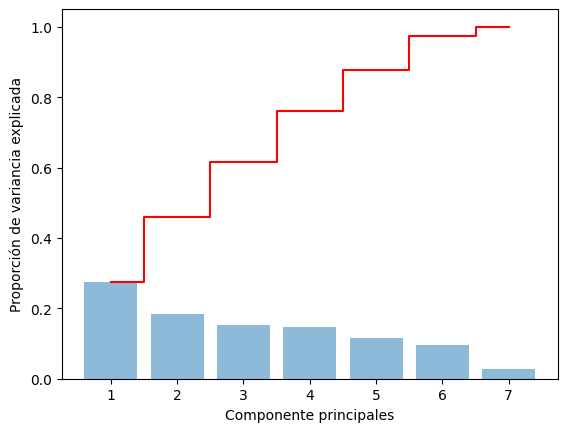

In [15]:
plt.bar(range(1,8), pca.explained_variance_ratio_,
        alpha=0.5,
        align='center')
plt.step(range(1,8), np.cumsum(pca.explained_variance_ratio_),
         where='mid',
         color='red')
plt.ylabel('Proporción de variancia explicada')
plt.xlabel('Componente principales')
plt.show()

*Grafico del codo*

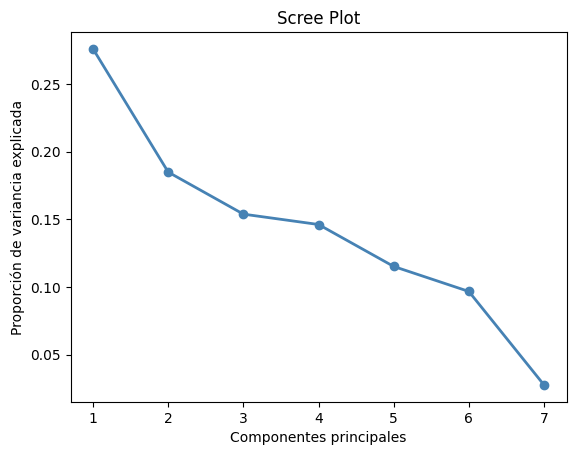

In [16]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='steelblue')
plt.title('Scree Plot')
plt.xlabel('Componentes principales')
plt.ylabel('Proporción de variancia explicada')
plt.show()

Matriz de correlacion para componentes seleccionados

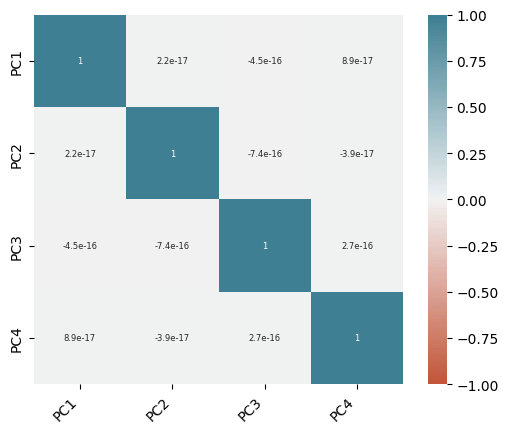

In [17]:
corr = pca_df[['PC1', 'PC2', 'PC3', 'PC4']].corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

# Isomap


-- Instalamos la libreria de plotly --

In [18]:
!pip install plotly-express

-- Importamos librerias para isomap --

In [19]:
from sklearn.manifold import Isomap
import plotly.express as px

In [20]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

-- Isomap --

In [21]:
isomap_df = Isomap(n_neighbors=60, n_components=2)
isomap_df.fit(df_std)
projections_isomap = isomap_df.transform(df_std)

fig = px.scatter(
    projections_isomap, x=0, y=1,
    color=df['label'], labels={'color': 'label'}
)
fig.update_traces(marker_size=8)
fig.show()

-- Interpretación:
* Cada punto representa una muestra del conjunto de datos origina
* A posición de cada punto en el plano 2D representa su ubicación después de la reducción de dimensionalidad mediante Isomap.
* Los colores de los puntos indican la clase
* La distancia entre los puntos en el gráfico de dispersión refleja las relaciones de proximidad o similitud entre las muestras en el espacio original.

In [22]:
isomap_df = Isomap(n_neighbors=6, n_components=2)
isomap_df.fit(df_std)
projections_isomap = isomap_df.transform(df_std)

fig = px.scatter(
projections_isomap, x=0, y=1,
color=df['label'], labels={'color': 'label'}
)

fig.update_traces(marker_size=8)
fig.show()


c:\Users\mateo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_isomap.py:359: UserWarning:

The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

c:\Users\mateo\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\sparse\_index.py:102: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

c:\Users\mateo\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\sparse\_index.py:102: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

c:\Users\mateo\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\sparse\_index.py:102: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

c:\Users\mateo\AppData\Local\Programs\Python\Py

# TSNE

-- Importamos TSNE --

In [23]:
from sklearn.manifold import TSNE

In [24]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

-- Instalamos una libreria necesaria que nos pedia --

In [25]:
!pip install --upgrade nbformat

-- Aplicamos TSNE --


Implicancia:
* Reducción no lineal de dimensionalidad
* Preservación de estructuras locales y globales

In [26]:
tsne = TSNE(n_components=2, random_state=0, perplexity=10)  # Aplicar t-SNE para reducir a 2 dimensiones
projections_tsne = tsne.fit_transform(df_std)

df_tsne = pd.DataFrame(projections_tsne, columns=['Componente 1', 'Componente 2']) # df datos transformados

df_tsne['label'] = df['label']  # Agregar la columna 'label'

# Graficar los datos en 2D usando Plotly Express
fig = px.scatter(df_tsne, x='Componente 1', y='Componente 2', color='label', labels={'color': 'label'})
fig.update_traces(marker_size=5)
fig.update_layout(title='Visualización t-SNE en 2D')
fig.show()

c:\Users\mateo\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "c:\Users\mateo\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\mateo\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mateo\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1024, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  Fil

-- Interpretación 
* Cada punto en el gráfico representa una muestra del conjunto de datos original.
* Los colores de los puntos representan las etiquetas (label) de las muestras
* Las muestras que son similares entre sí en el espacio original (en términos de características) deberían estar próximas entre sí en el gráfico de dispersión
* Las estructuras y agrupaciones en el gráfico pueden revelar patrones o relaciones entre las muestras que no son evidentes en dimensiones más altas

# K-means

-- Importamos kmeans --

In [27]:
from sklearn.cluster import KMeans

Diagrama del codo. Identificar un punto en el gráfico donde la disminución en la suma de las distancias intraclúster (también conocida como inercia) comienza a disminuir de manera significativamente más lenta.
La inercia en K-means se calcula sumando las distancias cuadradas entre cada punto de datos y el centroide de su grupo asignado, y luego sumando estas distancias para todos los puntos en el conjunto de datos.

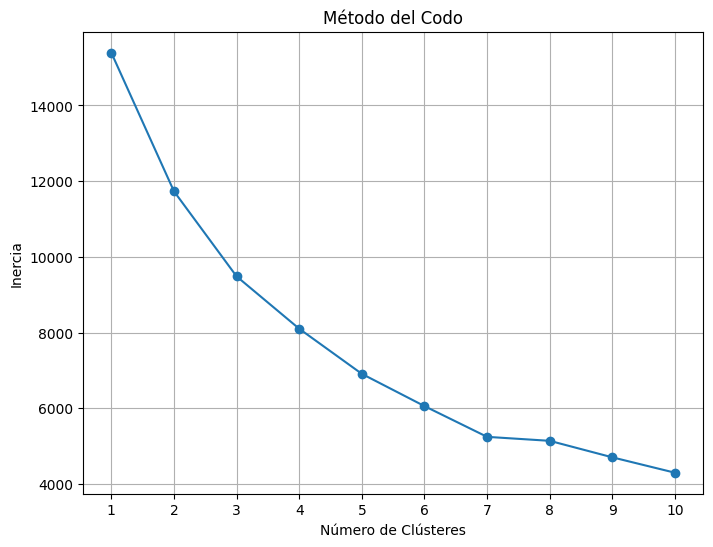

In [28]:
inercia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_std)
    inercia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inercia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.xticks(np.arange(1, 11))
plt.grid(True)
plt.show()

#### Modelo Kmeans

In [29]:
kmeans = KMeans(n_clusters=4) # Metodo del codo.
kmeans.fit(df_std) #Entrenamos el modelo

# El metodo labels_ nos da a que cluster corresponde cada observacion
df['Cluster KMeans'] = kmeans.labels_
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,Cluster KMeans
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,2
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,2
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,2
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,2
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,2


#### Interpretaciones

-- 
* El índice en la serie (0, 1, 2, 3 ) representa el número de cluster al que se refiere el recuento de observaciones.
* Cada valor en la serie indica la cantidad de observaciones asignadas a ese cluster en particular después de ejecutar el algoritmo K-means
-- 

In [30]:
observaciones_por_cluster = df['Cluster KMeans'].value_counts().sort_index()
observaciones_por_cluster

Cluster KMeans
0    200
1    582
2    621
3    797
Name: count, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   N               2200 non-null   int64   
 1   P               2200 non-null   int64   
 2   K               2200 non-null   int64   
 3   temperature     2200 non-null   float64 
 4   humidity        2200 non-null   float64 
 5   ph              2200 non-null   float64 
 6   rainfall        2200 non-null   float64 
 7   label           2200 non-null   category
 8   Cluster KMeans  2200 non-null   int32   
dtypes: category(1), float64(4), int32(1), int64(3)
memory usage: 131.9 KB


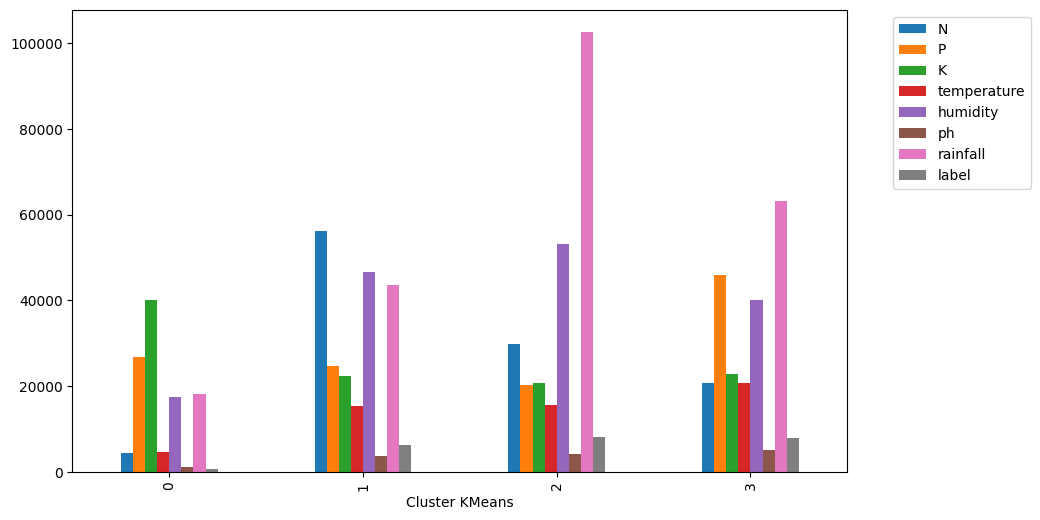

In [32]:
df['label'] = df['label'].cat.codes  # Convierte categorías a códigos numéricos
df.groupby('Cluster KMeans').sum().plot(kind='bar', figsize=(10, 6))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

* En el eje x del gráfico, cada barra está etiquetada con el número de cluster (0, 1, 2, 3, etc.) generado por K-means.
* El eje y muestra la suma total de los valores de las características para las observaciones dentro de cada cluster. Cada barra representa la suma acumulada de las características para un cluster específico.

#### Gap statistics

* Identificación del número aprox de clusters

In [33]:
def calculate_intra_cluster_dispersion(X, k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    return kmeans.inertia_

In [34]:
gaps = []
max_k = 10
for k in range(1, max_k + 1):
    # Calculo la inercia real sobre mis datos reales
    real_inertia = calculate_intra_cluster_dispersion(df_std, k)
    #Calculo al inercia de datos aleatorios con la mismsa estrucutra que mis datos originales
    inertia_list = []
    for _ in range(10):
      random_data = np.random.rand(*df_std.shape)
      intra_cluster_dispersion = calculate_intra_cluster_dispersion(random_data, k)
      inertia_list.append(intra_cluster_dispersion)

    reference_inertia = np.mean(inertia_list)

    #Aplico la funcion de gap
    gap = np.log(reference_inertia) - np.log(real_inertia)
    gaps.append(gap)


optimal_k = np.argmax(gaps) + 1

Número óptimo de clusters según el Gap Statistic: 9


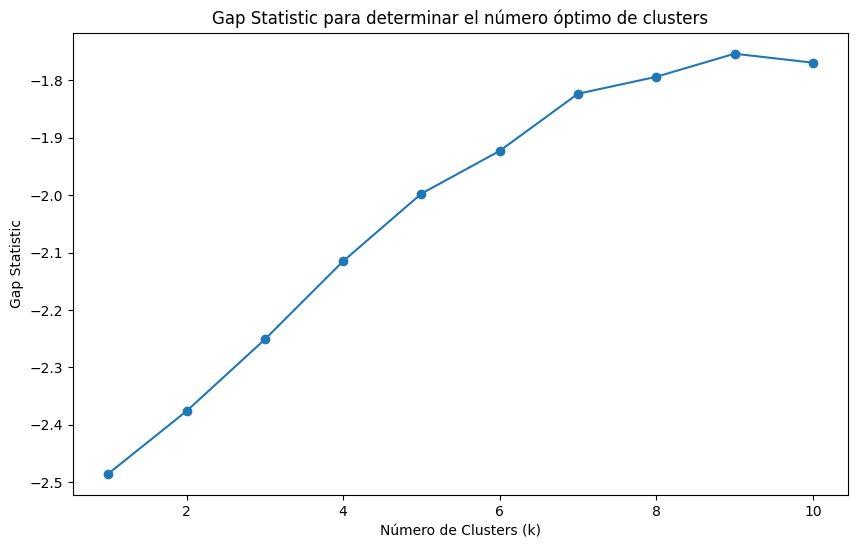

In [50]:
print("Número óptimo de clusters según el Gap Statistic:", optimal_k)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), gaps, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic para determinar el número óptimo de clusters')
plt.show()

#### Grafico 3d

In [36]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,Cluster KMeans
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20,2
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20,2
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20,2
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20,2
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20,2


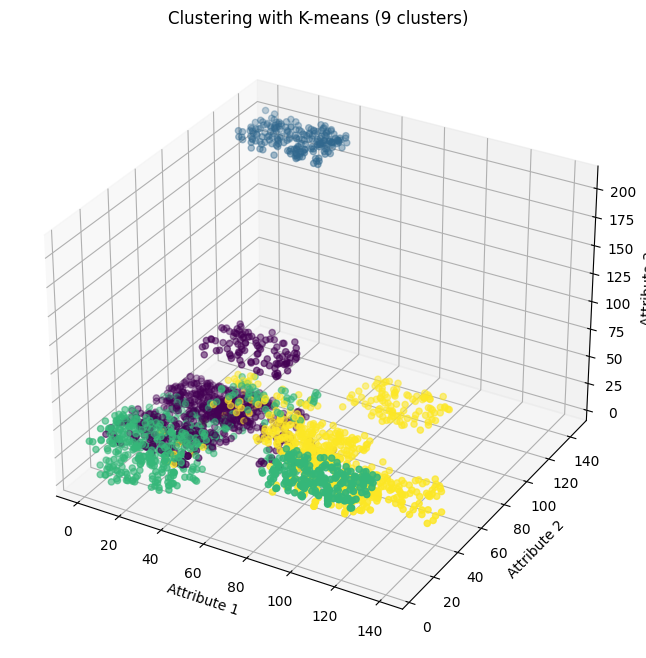

In [37]:
labels = kmeans.fit_predict(df_std)
# Crear una figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar puntos 3D y colorear por cluster
ax.scatter(df['N'], df['P'], df['K'], c=labels, cmap='viridis')

# Configurar etiquetas y título
ax.set_xlabel('Attribute 1')
ax.set_ylabel('Attribute 2')
ax.set_zlabel('Attribute 3')
ax.set_title('Clustering with K-means ({} clusters)'.format(optimal_k))

# Mostrar el gráfico
plt.show()

-- Interpretacion 
* Cómo se agrupan y distribuyen los puntos en el espacio tridimensional. Los puntos que están más cerca entre sí en este espacio probablemente pertenezcan al mismo cluster.
* Los diferentes colores representan diferentes clusters identificados por el algoritmo K-means. Identifica áreas donde los puntos del mismo color están agrupados, lo que indica la formación de clusters en función de las características utilizadas.

# Cluster Jerarquico


-- Aplicar clustering jerárquico y determinar cuál número sería el que mejor represente los
datos. Utilizar el score de Silhouette y calcular el número óptimo de cluster por medio de
GAP. --

In [38]:
df_std

,N,P,K,temperature,humidity,ph,rainfall
0,1.068554,-0.344472,-0.101664,-0.935374,0.472559,0.043292,1.809949
1,0.933117,0.140584,-0.141153,-0.759473,0.396961,0.734706,2.241548
2,0.255928,0.049636,-0.081920,-0.515781,0.486843,1.771108,2.920402
3,0.635154,-0.556684,-0.160897,0.172768,0.389717,0.660158,2.536471
4,0.743504,-0.344472,-0.121409,-1.083401,0.454688,1.497527,2.897714
...,...,...,...,...,...,...,...
2195,1.529043,-0.587000,-0.318850,0.228762,-0.227657,0.401303,1.352129
2196,1.312342,-1.163004,-0.417571,0.355639,-0.666796,-0.494300,0.445081
2197,1.827006,-0.617316,-0.358338,-0.293152,-0.191192,-0.138089,1.271129
2198,1.799918,-0.647632,-0.279362,0.129583,-0.869320,0.373819,0.431447


-- Standarizamos los datos -- 

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

-- Calucular distancias entre pares de clusters para construir una estructura jerárquica de agrupamiento. --

In [40]:
Z = linkage(X_scaled, "ward")

-- Interpretación del Dendograma.
* El eje vertical (eje y) representa la distancia o la medida de disimilitud entre clusters u observaciones
* El eje horizontal (eje x) muestra las observaciones individuales o los clusters en el conjunto de datos.
* Representa el proceso de construccion de los grupos.
* Un punto débil no ofrece información sobre la distancia entre los distintos objetos.
* Generan diferentes niveles de agrupamiento
* No es la solución global optima.

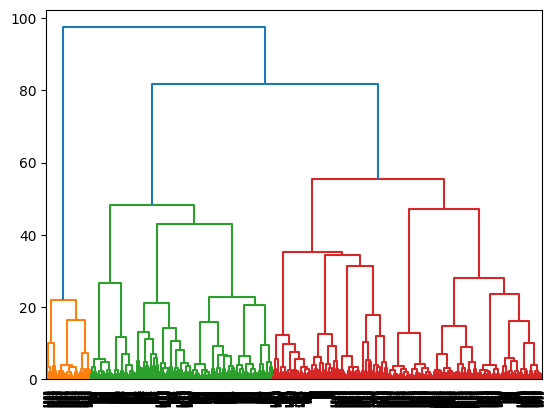

In [51]:
dendrogram(Z)
plt.show()

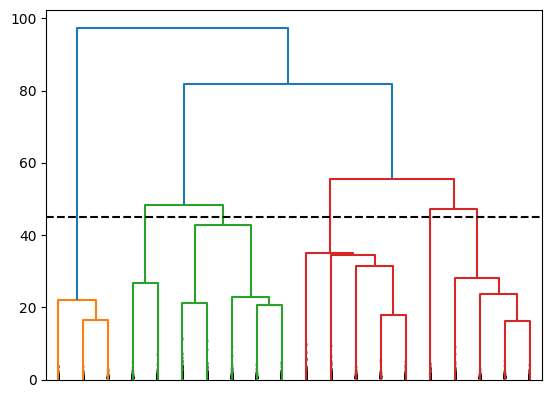

In [53]:
dendrogram(Z,  truncate_mode = 'lastp', p = 20, show_leaf_counts = False, show_contracted = True)
plt.axhline(y=45, c='k', linestyle='dashed') #Cambiar linea
plt.show()

-- AgglomerativeClustering --
*  Calcula y compara las distancias entre clusters en un análisis de clustering jerárquico aglomerativo para determinar la estructura de clustering óptima en función del número de clusters. La lista distancias proporciona una métrica cuantitativa para evaluar la coherencia y la calidad de los clusters generados por el algoritmo.


In [54]:
from scipy.spatial.distance import cdist

distancias=[]
for i in range(1, 30):
    clustering = AgglomerativeClustering(n_clusters=i)
    clustering.fit(X_scaled)

    # Calculo la matriz de distancias entre puntos
    pairwise_distances = cdist(X_scaled, X_scaled, 'euclidean')

    # Calculo la distancia total entre los clusters
    distancia_total = 0
    for j in range(i):
        cluster_indices = np.where(clustering.labels_ == j)
        distancia_total += pairwise_distances[cluster_indices][:, cluster_indices].sum()

    distancias.append(distancia_total)

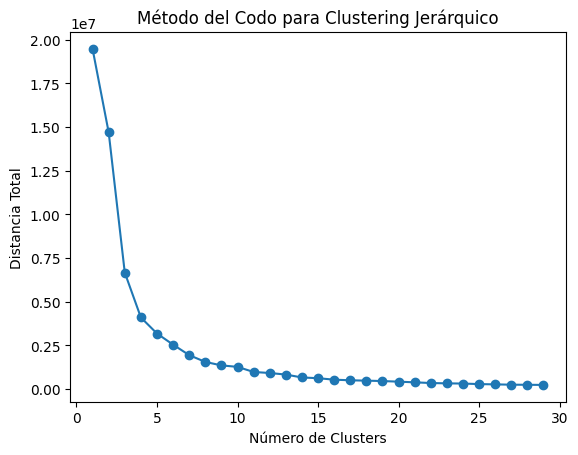

In [55]:
plt.plot(range(1, 30), distancias, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Distancia Total')
plt.title('Método del Codo para Clustering Jerárquico')
plt.show()

-- Tomamos aprox 9 clusters. --

In [64]:
n_clusters = 9
clustering = AgglomerativeClustering(n_clusters=n_clusters)

cluster_assignments = clustering.fit_predict(X_scaled)

df['Cluster'] = cluster_assignments

df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,Cluster KMeans,Cluster
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20,2,8
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20,2,8
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20,2,8
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20,2,8
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20,2,8


-- Silhouette score --
* Métrica que se utiliza para calcular la bondad de una técnica de agrupación. Su valor oscila entre -1 y 1.
* 1: Significa que los grupos están bien separados unos de otros y claramente distinguidos.
* 0: Significa que los clusters son indiferentes, o podemos decir que la distancia entre
clusters no es significativa.
* -1: significa que los grupos están asignados de forma incorrecta.

In [57]:
from sklearn.metrics import silhouette_score,silhouette_samples
silhouette_avg = silhouette_score(X_scaled, cluster_assignments)
silhouette_avg

0.269992695791034

In [58]:
!pip install gap-stat

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: still running...
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for gap-stat: filename=gap_stat-2.0.3-py3-none-any.whl size=6137 sha256=9d4334926555debc1df7507673e924419fd6d276fb460711ce6459078458b5be
  Stored in directory: c:\users\mateo\appdata\local\pip\cache\wheels\20\56\24\2a593b1a12d055f6283ca90cadcfbcbd790032b8dfdf407431
Successfully built gap-stat


-- Hacemos GAP para el número optimo local de cluster. --

In [59]:
from gap_statistic import OptimalK

In [65]:

gs_obj = OptimalK(n_jobs=1, n_iter=20)
n_clusters = gs_obj(Z.astype('float'), n_refs=60,
cluster_array=np.arange(2, 10))
print('Estimated number of clusters: ', n_clusters)

Estimated number of clusters:  8


In [61]:
len(Z)

2199

-- Interpretación
* Cada color representa un cluster diferente.
* Los clusters están bien definidos y separados entre sí o se superponen?


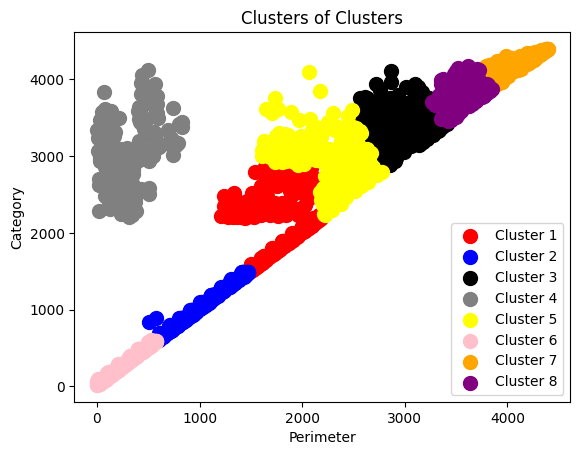

In [62]:
hc = AgglomerativeClustering(n_clusters = 9, metric= 'euclidean',
 linkage = 'ward')
y_hc = hc.fit_predict(Z)
plt.scatter(Z[y_hc == 0, 0], Z[y_hc == 0, 1],
s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Z[y_hc == 1, 0], Z[y_hc == 1, 1],
s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(Z[y_hc == 2, 0], Z[y_hc == 2, 1],
s = 100, c = 'black', label = 'Cluster 3')
plt.scatter(Z[y_hc == 3, 0], Z[y_hc == 3, 1],
s = 100, c = 'grey', label = 'Cluster 4')
plt.scatter(Z[y_hc == 4, 0], Z[y_hc == 4, 1],
s = 100, c = 'yellow', label = 'Cluster 5')
plt.scatter(Z[y_hc == 5, 0], Z[y_hc == 5, 1],
s = 100, c = 'pink', label = 'Cluster 6')
plt.scatter(Z[y_hc == 6, 0], Z[y_hc == 6, 1],
s = 100, c = 'orange', label = 'Cluster 7')
plt.scatter(Z[y_hc == 7, 0], Z[y_hc == 7, 1],
s = 100, c = 'purple', label = 'Cluster 8')
plt.title('Clusters of Clusters')
plt.xlabel('Perimeter')
plt.ylabel('Category')
plt.legend()
plt.show()

# Conclusiones

-- Para concluír el trabajo realizado utilizando técnicas de Análisis Exploratorio de Datos y clustering, asi como métricas como le de silhoutte, entre otras, nos permitió tener diferentes perspectivas sobre nuestros datos y el proceso de análisis que llevamos a cabo.

Además, todo el trabajo realizado nos proporciona una comprensión más profunda de los datos y sus patrones. Todo lo que nos encontramos puede llegar a tener implicaciones importantes para aplicaciones prácticas en algun problema futuro.

Llevó mucho tiempo pero aprendimos mucho sobre clustering utilizando las diferentes técnicas, PCA, TSNE, ISOMAP,Kmeans, etc.
En conclusión, todo el proceso representa el analisis exhaustivo de los datos, desde la exploración inicial hasta la interpretación final de los clusters que identificamos. Identificamos patrones, estructuras dentro de los datos.